## Probability and Statistics Refresher

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [29]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

Today we'll review the essentials of probability and statistics.  Given the prerequisites for this course, I assume that you learned all of this once.  What I want to do today is bring the material back into your mind fresh.

## Probability

What is probability?  

Historically, the notion of probability has actually been very slippery and hard to pin down exactly.   There are probably at least three ways to view probability in practice:

1. as a mathematical exercise involving positive functions that integrate to 1 (i.e., distributions).
2. as an encoding of natural rules for reasoning under uncertainty. 
3. as an idealization of properties of data and processes.

For our purposes, we use probability as an abstraction that hides details we don't want to deal with.  This is a time-honored use of probability.

>Any simple idea is approximate; as an illustration, consider an object ... what is an object? Philosophers are always 
>saying, “Well, just take a chair for example.” The moment they say that, you know that they do not know what they are 
>talking about any more. What is a chair? ... every object is a mixture of a lot of things, so we can deal with it 
> only as a series of approximations and idealizations.

>The trick is the idealizations.

Richard Feynman, _The Feynman Lectures on Physics, 12-2_

Here is an illustration of this principle applied to probability:

>In a serious work ... an expression such as “this phenomenon is due to chance” constitutes simply, 
>an elliptic form of speech. ... It really means “everything occurs as if this phenomenon were due to chance,” 
>or, to be more precise: “To describe, or interpret or formalize this phenomenon, 
>only probabilistic models have so far given good results.”

Georges Matheron, _Estimating and Choosing: An Essay on Probability in Practice_

### Probability and Conditioning

__Definition.__  Consider a set $\Omega$, referred to as the
_sample space._  A _probability
  measure_ on $\Omega$ is a function $P[\cdot]$ defined on all the subsets of $\Omega$ (the
  _events_) such that:
1. $P[\Omega] = 1$
2. For any event $A \subset \Omega$, $P[A] \geq 0.$
3. For any events $A, B \subset \Omega$ where $A \cap B =
    \emptyset$, $P[A \cup B] = P[A] + P[B]$.



Often we want to ask how a probability measure changes if we restrict the sample space to be some subset of $\Omega$.  

This is called __conditioning.__

__Definition.__ The _conditional probability_ of an event $A$ given that
event $B$ (having positive probability) is known to occur, is 

$$ P[A|B] = \frac{P[A \cap B]}{P[B]}  \mbox{ where } P[B] > 0 $$

The function $P[\cdot|B]$ is a probability measure over the sample space
$B$.  

Note that in the expression $P[A|B]$, $A$ is random but $B$ is fixed. 

Now if $B$ is a proper subset of $\Omega,$ then $P[B] < 1$.   So $P[\cdot|B]$ is a rescaling of the quantity $P[A\cap B]$ so that $P[B|B] = 1.$ 

The sample space $\Omega$ may be continuous or discrete, and bounded or unbounded.

## Random Variables

We are usually interested in numeric values associated with events.  

When a random event has a numeric value we refer to it as a random variable.

Notationally, we use CAPITAL LETTERS for random variables and lowercase for non-random quantities.

To collect information about what values of the random variable are more probable than others, we have some more definitions.

__Definition.__ The cumulative distribution function (CDF) F for a random
 variable $X$ is equal to the probability measure for the event that
 consists of all possible outcomes with a value of the random variable $X$
 less than or equal to $x$, that is, $F(x) = P[X \leq x].$

__Example.__  Consider the roll of a single die.  The random variable here is the number of points showing.  What is the CDF?

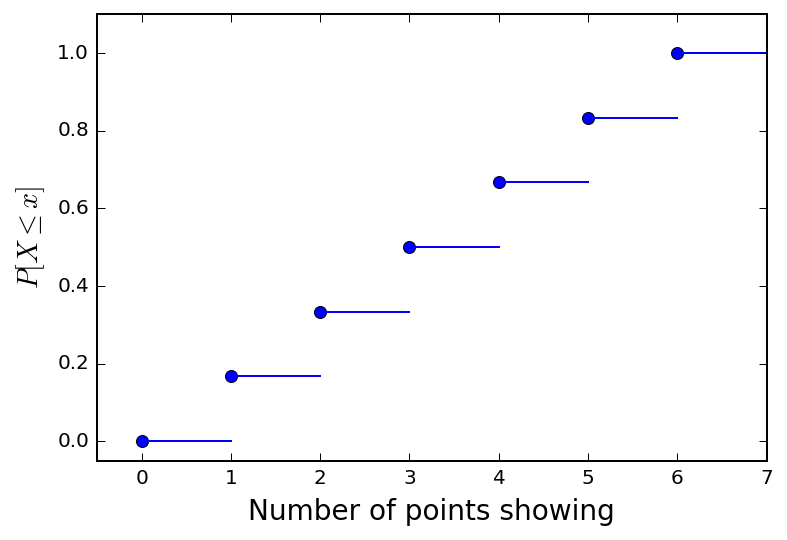

In [41]:
sl.hide_code_in_slideshow()
plt.figure()
for i in range(7):
    plt.plot(i,i/6.,'ob')
    plt.plot([i,i+1],[i/6.,i/6.],'-b')
plt.xlim([-0.5,7])
plt.ylim([-0.05,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

Now, consider this CDF of some random variable:

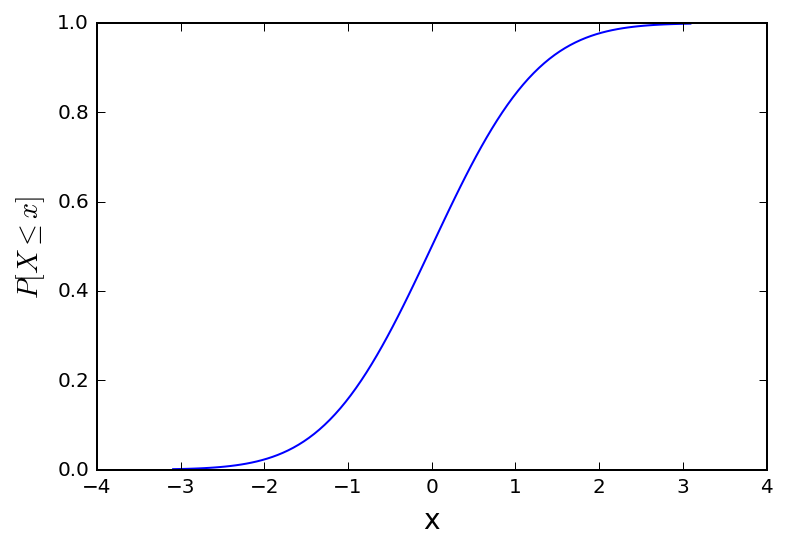

In [43]:
sl.hide_code_in_slideshow()
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-')
plt.xlabel('x',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

What does it mean when the slope is steeper for some $x$ values?

The slope tells us how likely values are in a particular range.

This is important enough that we define a function to capture it.  

__Definition.__ The _probability density function_ (pdf) is the derivative of the CDF, when that is defined.

$$ f(x) = \frac{dF(x)}{dx}.$$

Often we will go the other way as well:

$$ F(x) = \int_{-\infty}^{x} f(t)\; dt $$

You should be able to see that:

$$ \int_{-\infty}^{+\infty} f(x)\; dx = 1 $$

and

$$      f(x) \geq 0 $$

Now, for a discrete random variable, the CDF is not differentiable (because the CDF is a step function).  

For the PDF of discrete RVs, we simply plot the probability function of
each value.  That is, we plot $P[X = x]$ for the various values of $x$.

Another way to think of the PDF is that it consists of impulses at the
points of discontinuity of the CDF. 

For our example of the single die:

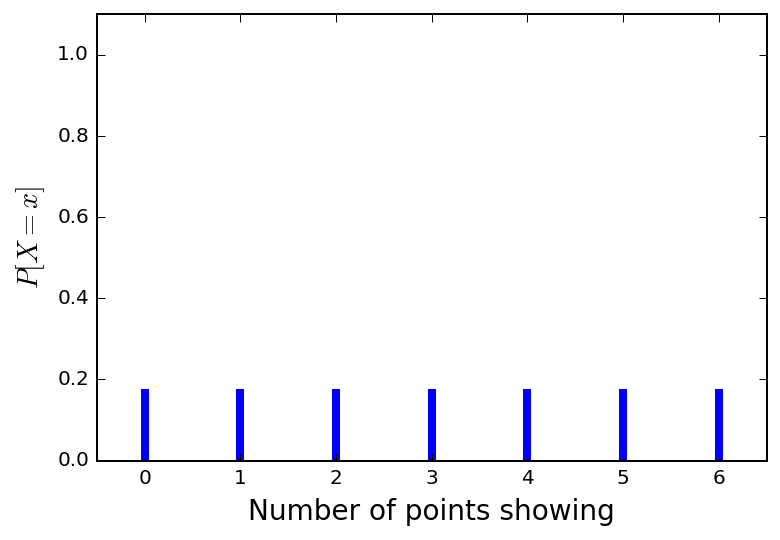

In [49]:
sl.hide_code_in_slideshow()
plt.figure()
for i in range(7):
    plt.plot([i,i],[0,1/6.],'-b',lw=4)
plt.xlim([-0.5,6.5])
plt.ylim([0,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X = x]$',size=14)
print('')

## Characterizing Random Variables

__Definition.__ The _expected value_ $E[X]$ of a random
variable $X$ is the probability-weighted sum or integral of all possible values of
the R.V.  

For a discrete random variable, this is:

$$ E[K] \equiv \sum_{-\infty}^{+\infty} k\; P[K=k] $$

and for a continuous random variable with pdf $p():$

$$ E[K] \equiv \int_{-\infty}^{+\infty} k\; p(k)\; dk $$

The expected value is also called the average or the mean, although we
prefer to reserve those terms for empirical statistics (actual
measurements, not idealizations like these formulas).

The expected value is in some sense the "center of mass" of the random
variable.   It is often denoted $\mu$.

The mean is usually a quite useful characterization of the random variable.

However, be careful: in some cases, the mean may not be very informative, or important.  

In some cases a
random variable may not ever take on the mean as a possible value.  (Consider again the single die, whose mean is 3.5)

In other cases the notion of average isn't useful, as for the person
with their head in the oven and feet in the freezer who claims "on
average I feel fine." 

In other words, the mean may not be very informative when
observations are highly variable.   

In fact, the variability of random quantities is crucially important to characterize.

For this we use __variance,__ the mean squared difference of the random variable from its mean.

__Definition.__ The variance of a random variable $X$ is

$$ Var(X) \equiv E[(X - E[X])^2]$$.

For a discrete R.V. with $E[X] = \mu$ this would be:
$$ Var(X) = \sum_{x=-\infty}^{+\infty} (x-\mu)^2\; P[X=x]. $$

The units of variance are the square of the units of the mean. 

To compare variance and mean, we take the square root of the variance.

This is called the __standard deviation__ and is denoted $\sigma$.
So variance is denoted $\sigma^2$.

Next, let's recall the case of the Tesla and Yelp returns from the last lecture:

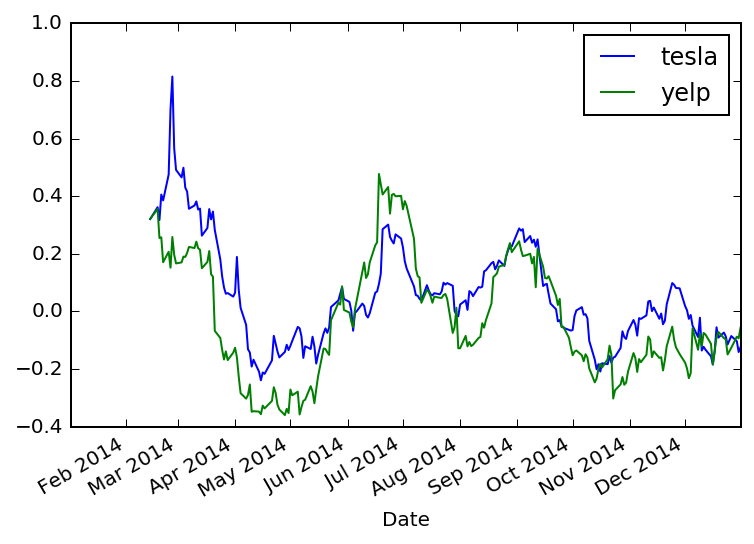

In [59]:
sl.hide_code_in_slideshow()
import pandas as pd
import pandas_datareader.data as web

stocks = ['TSLA', 'YELP']
attr = 'Close'
df = web.DataReader(stocks, 
                    data_source,                               
                    start=datetime(2014, 1, 1), 
                    end=datetime(2014, 12, 31))[attr]
rets = df.pct_change(30)
rets.TSLA.plot(label = 'tesla')
rets.YELP.plot(label = 'yelp')
plt.legend(loc='best')

Treating these two timeseries as random variables, we are interested in how the vary __together__.

This is capture by the concept of __covariance.__

__Definition.__ For two random variables $X$ and $Y$, their _covariance_ is defined as:

$$\text{Cov}(X,Y) = E\left[(X-\mu_X)(Y-\mu_Y)\right]$$

Basically, covariance is large when $X$ and $Y$ tend to be both above their means together, and both below their means together.

\subsection{Law of total probability.}

Let $A_1, A_2, ..., A_n$ be events such that

\begin{enumerate}
\item $A_i \cap A_j = \emptyset$ if $i \neq j$
\item $P[A_i] > 0, i = 1, 2, ..., n.$
\item $A_1 \cup A_2 \cup ... \cup A_n = \Omega$
\end{enumerate}

(Such a family of events is called a {\em  partition\/} of $\Omega$.)

Then for any event A,

\[ P[A] = P[A_1]\,P[A|A_1] + P[A_2]\,P[A|A_2] + ... + P[A_n]\,P[A|A_n] \]

\subsection{Law of total expectation.}

Conditional expectation is defined as follows:

\[ E[X|Y = y_j] = \sum_{x_i} x_i \, P[X = x_i | Y = y_j] \]

(Note that this definition follows directly from the definition of
expectation we have already seen.)  The the law of total expectation
states:  

\[ E[X] = \sum_{y_i} E[X | Y = y_i] \, P[Y=y_i]\]

Note that the set ${y_i}$ forms a partition over the possible values of
$Y$. 



\subsection{Bayes' Rule.}

Suppose that $A_1, A_2, ..., A_n$ form a partition of $\Omega$.  Then
for any event $B$ with $P[B] > 0$,

\[ P[A_i|B] = \frac{P[B|A_i]\,P[A_i]}{P[A_1]\,P[B|A_1] + P[A_2]\,P[B|A_2] +
  ... + P[A_n]\,P[B|A_n]} \]

You should be able to see how to derive this; steps are 1) expand into a
fraction using the
definition of conditional probability; 2) denominator then
follows from law of total probability;  3) numerator is based on
rewriting $P[A_i \& B]$ using definition of conditional probability
again. 

Note how we are updating our estimate of the probability of each $A_i$
based on the new information, namely, that $B$ is true.   This update
transforms the {\em prior\/} probabilities $P[A_i]$ into the {\em
  posterior\/} probabilities $P[A_i|B]$.

This is useful because often the probabilities $P[B|A_i]$ can be
estimated. 

\boxit{
{\bf Example.}  Empirical evidence suggests that amongs sets of twins,
about 1/3 are identical.  Assume therefore that probability of a pair of
twins being identical to be 1/3.  Now, consider how a couple might
update this probability after they get an ultrasound that shows that the
twins are of the same gender.   What is their new estimate of the
probability that their twins are identical?

Let $I$ be the event that the twins are identical.  Let $G$ be the event
that gender is the same via ultrasound.  The prior probabilities here
are $P[I]$ and $P[\bar{I}]$.  What we want to calculate are the
posterior probabilities $P[I|G]$ and $P[\bar{I}|G].$

First, we note:
\[ P[G|I] = 1 \]

(Surprisingly, people are sometimes confused about that fact!)   Also,
we assume that if the twins are not identical, they are like any two
siblings, {\em i.e.,\/} their probability of being same gender is 1/2: 

\[ P[G|\bar{I}] = 1/2 \]

And we know from observing the population at large that among all sets
of twins, about 1/3 are identical:

\[ P[I] = 1/3 \]

Then:

\[ P[I|G] = \frac{P[G|I] P[I]}{P[G|I]\,P[I] + P[G|\bar{I}]\,P[\bar{I}]}
= \frac{1 \cdot 1/3}{(1 \cdot 1/3) + (1/2 \cdot 2/3)} = \frac{1}{2}\]

So we have updated our estimate of the twins being identical from 1/3
(prior probability) to 1/2 (posterior probability).
}

Note how easy it was to determine $P[G|I]$ and $P[G|\bar{I}]$, while the
other case $P[I|G]$ was not so obvious -- hence the utility of Bayes' rule.



## Low and High Variability

Historically, most sources of random variation that have concerned
statisticians are instances of low variability.  

The original roots of
probability in the study of games of chance, and later in the study of
biology and medicine, have mainly studied objects with low variability.

Some examples of random variation in this category are: 
* the heights of adult humans
* the number of trees per unit area in a mature forest
* the sum of 10 rolls of a die
* the time between emission of subatomic particles from a radioactive material.

In each of these cases, there are a range of values that are
 "typical," and there is a clear threshold above what is typical, that essentially never occurs.

On the other hand, there are some situations in which variability is
quite different.  

In these cases, there is no real "typical" range of
values, and arbitrarily large values can occur with non-negligible
frequency.   

Some examples in this category are
* the distribution of wealth among individuals in society
* the sizes of human settlements
* the areas burnt in forest fires
* the runs of gains and losses in various financial markets over time
* and the number of collaborators a scholar has over her lifetime.   

> The banking system (betting against rare events) just lost [more than] 1
> Trillion dollars (so far) on a single error, more than was ever earned
> in the history of banking.

Nassim Nicholas Taleb, September 2008 





![](figs/derivatives-portfolio-variation.png)

An example of a run of observations showing high variability.   This figure shows the daily
variations in a derivatives portfolio over the timeframe 1988-2008.
About 99% of the variation over the 20 years occurs in a single day
(the day the European Monetary System collapsed).


Important Discrete RVs.   Geometric, Binomial, Poisson, Uniform.

## Important Random Variables

### Independent Trials

Here is our canonical experiment: flipping a weighted coin.  

The coin
comes up "heads" (aka "success") with probability $p$.  

We use the standard notation that the corresponding probability ("tails", "failure") is denoted $q$
(i.e., $q = 1-p$).  

These are called _Bernoulli trials_; one can think of each trial as a timestep so these are about _discrete
  time_.

Now we will extend this notion to continuous time.

Imagine that you "speed up" the coin flipping so that instead of flipping a coin once per second,
you flip it $m$ times per second, and you simultaneously decrease the
probability of success to $p/m$.   

Then you expect the same number of
successes per second (i.e., $p$), but successes can happen at finer time
intervals.   

Now imagine the limit as $m \rightarrow \infty$.  

This is a
mathematical abstraction in which 
* a success can happen at _any_ time instant
* success at any time instant is equally likely
* and success at any time instant is independent of any other time instant (it's still a coin with no memory).   

Now we can think of successes happening at some _rate_ $\lambda$ that is
equal to $p$ per second.  

Note that $\lambda$ has units of inverse time, e.g., sec$^{-1}$. 

For each of these two cases (discrete and continuous time) there are two questions we can ask:

1. Given that a success has just occured, how long until the next
  success?
2. In a fixed number of trials or amount of time, how many successes
  occur?


These four cases define four commonly-used random variables.




| | Trials/Time Until Success | Number of Successes in Fixed Time  |
|-|:--:|:--:|
|Discrete Trials| Geometric| Binomial |
|Continuous Rate| Exponential | Poisson|



Important Continuous RVs.  Exponential, Gaussian.

Long tails, short tails.

Some examples of manipulating data to compute probabilities.

## Statistics

Estimating the mean.  Distinguishing between models and data.  Explain about estimating the mean when the mean doesn't exist, as a way of distinguishing between models and data.


Bayes' Rule.